# Investment Analysis Assignment

### Checkpoint 1: Data Cleaning 1

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading Dataset
companies = pd.read_csv("companies.csv", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")

In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 2.5+ MB


In [4]:
# Finding number of unique rows in permalink column
len(companies.permalink.unique())

66368

In [5]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 3.1+ MB


In [6]:
# Finding number of unique rows in company_permalink column
len(rounds2.company_permalink.unique())

90247

In [7]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [9]:
# As you can see in above tables, few rows of "permalink" in companies and few rows of "company_permalink" in rounds2 are same 
# but are in different case. Example:
'''
Second row in companies is : /Organization/-Qounter
Second row in rounds2 is : /ORGANIZATION/-QOUNTER
Both are same, but one is in capitals and other is having small letters. 

So convert the two columns to lowercase
'''
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()


Any companies present in rounds2 file which are not present in companies?

Answer: <b>Yes</b>

Reason: The number of unique companies in rounds2 is greater than number of unique companies in companies

In [10]:
# Merging the two dataframes companies and round2
master_frame=pd.merge(rounds2,companies,how="left",left_on="company_permalink",right_on="permalink")

In [11]:
master_frame.shape  # Observations present in master frame

(114949, 16)

In [12]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


### Data Cleaning

In [13]:
# get sum of null rows in each column
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [14]:
# Seeing the percentage of null values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

###### Removing funding_round_code column

In [15]:
''' 
funding_round_code is accounts for 72.91% of missing data. We cannot remove these many rows. So removing the column. 
'''
master_frame = master_frame.drop('funding_round_code', axis=1)

In [16]:
# Seeing the percentage of null values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

###### Removing founded_at column

In [17]:
''' 
founded_at is accounts for 17.86% of missing data. This column is not at all needed for analysis
'''
master_frame = master_frame.drop('founded_at', axis=1)

In [18]:
# Seeing the percentage of null values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
dtype: float64

###### Removing rows where raised_amount_usd is null

In [19]:
''' 
raised_amount_usd is accounts for 17.39% of missing data. Since this column is needed for analysis, 
we cannot remove this column. We can impute these based on its funding type and country (groupby funding type and country
and assign the value of median of other rows). 

But here im choosing to remove these rows as there are only 19990 of them 
'''
master_frame = master_frame[(pd.notnull(master_frame['raised_amount_usd']))]

In [20]:
# Seeing the percentage of null values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

###### Removing rows where category_list is null

In [21]:
''' 
category_list is accounts for 1.10% of missing data. Since this column is needed for analysis, 
we cannot remove this column. I think we cannot impute the values for this column statistically as it requires 
the knowledge of the companies.

So, im choosing to remove these rows where category_list is null
'''
master_frame = master_frame[(pd.notnull(master_frame['category_list']))]

In [22]:
# Seeing the percentage of null values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.27
category_list              0.00
status                     0.00
country_code               5.73
state_code                 7.58
region                     6.99
city                       6.99
dtype: float64

###### Removing rows where country_code is null

In [23]:
# there are few missing entries in country_code, let's see if we can fill the values
''' We can see if region is present for the rows where country code is NaN. If region is present, we can impute country 
code based on region '''

master_frame[(pd.isnull(master_frame['country_code'])) & (pd.notnull(master_frame['region']))] # => no rows

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city


In [24]:
'''
From above, we can see that for all rows where country_code is null, region is also null. So to impute country_code, we
need to have knowledge about the company. 

Here, i'm choosing to remove rows where country code is null
'''

master_frame = master_frame[(pd.notnull(master_frame['country_code']))]

In [25]:
# Seeing the percentage of null values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               3.67
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

now the columns 'homepage_url', 'state_code', 'region', 'city' are having null values. Since these four columns are not required for analysis, let them be like that (since they are of very low percentage). We can also choose to remove, but either way it will not effect our analysis. Now our data cleaning is completed.

### Checkpoint 2: Funding Type Analysis

In [26]:
'''
Since Spark Funds wants to choose one of these four investment types for each potential investment they will make, let's 
compute the average of funcding types
''' 
funding_avg = master_frame.groupby('funding_round_type')['raised_amount_usd'].agg(np.mean)
funding_avg

funding_round_type
angel                    9.715739e+05
convertible_note         1.337187e+06
debt_financing           1.716765e+07
equity_crowdfunding      5.098980e+05
grant                    4.512698e+06
non_equity_assistance    4.807534e+05
post_ipo_debt            1.694518e+08
post_ipo_equity          6.607706e+07
private_equity           7.393849e+07
product_crowdfunding     1.353227e+06
secondary_market         8.443853e+07
seed                     7.477937e+05
undisclosed              1.589166e+07
venture                  1.172422e+07
Name: raised_amount_usd, dtype: float64

In [27]:
'''
As you can see, there are more funding types in master_frame than required. 
Since we require only 'seed','angel','venture','private_equity', removing all other rows with different funding type. 

Though this doesn't make a difference in averages, there will be clarity in the view
'''

master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [28]:
# Now finding funding average
funding_avg = master_frame.groupby('funding_round_type')['raised_amount_usd'].agg(np.mean)
funding_avg

funding_round_type
angel             9.715739e+05
private_equity    7.393849e+07
seed              7.477937e+05
venture           1.172422e+07
Name: raised_amount_usd, dtype: float64

In [29]:
list(funding_avg)

[971573.8911363636, 73938486.27527472, 747793.6824840009, 11724222.690204773]

As you can see above, <b>Venture</b> type funding is suitable for spark funds as it is between 5 million USD to 15 million USD

### Checkpoint 3: Country Analysis

Since we know the funding type, let's narrow down dataframe which has only venture funding type.

In [30]:
venture_frame = master_frame[master_frame["funding_round_type"]=="venture"]

In [31]:
venture_frame.shape

(47809, 14)

In [32]:
top9_country_average = venture_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
top9_country_average

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

Now top 9 countries are "USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN". Now let's make a dataframe <b>top9</b> with only these countries

In [33]:
top9 = venture_frame[venture_frame['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [34]:
top9.shape

(44118, 14)

Since Spark Funds wants to invest only in English Speaking Countries, we can see that top three english speaking countries are
<b>USA</b>, <b>GBR</b>, <b>IND</b>

### Checkpoint 4: Sector Analysis 1

Here,we need to map primary sector with main sector.

In [ ]:
# Creating primary sector column
top9['primary_sector'] =top9['category_list'].apply(lambda x: x.split('|')[0])

In [36]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics


Now we have extracted primary sector for each company and kept it in a separate column called primary_sector

In [37]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [38]:
mapping.shape

(688, 10)

In [39]:
# Removing null value rows for category_list column
mapping = mapping[(pd.notnull(mapping['category_list']))]

In [40]:
mapping['category_list'] = mapping['category_list'].str.lower() # converting all category list to lowercase

In [41]:
mapping['category_list'].unique()

array(['3d', '3d printing', '3d technology', 'accounting',
       'active lifestyle', 'ad targeting', 'advanced materials',
       'adventure travel', 'advertising', 'advertising exchanges',
       'advertising networks', 'advertising platforms', 'advice',
       'aerospace', 'agriculture', 'air pollution control', 'algorithms',
       'all markets', 'all students', 'alter0tive medicine', 'alumni',
       'a0lytics', 'android', 'angels', 'animal feed',
       'anything capital intensive', 'app discovery', 'app marketing',
       'app stores', 'application performance monitoring',
       'application platforms', 'apps', 'aquaculture', 'architecture',
       'archiving', 'art', 'artificial intelligence', 'artists globally',
       'assisitive technology', 'assisted living', 'auctions', 'audio',
       'audiobooks', 'augmented reality', 'auto', 'automated kiosk',
       'automotive', 'b2b', 'b2b express delivery', 'babies',
       'baby accessories', 'baby boomers', 'baby safety', 'bankin

As you can see above, the letters "na" are replaced with 0. So we need to do correction

In [42]:
def correct_spelling(str):
    if str.endswith("0"):
       return str
    elif "0" in str:
       return str.replace("0", "na")
    else:
       return str

In [43]:
mapping['category_list'] = mapping['category_list'].apply(lambda x:correct_spelling(x)) # correcting spelling mistakes

In [44]:
mapping['category_list'].unique()

array(['3d', '3d printing', '3d technology', 'accounting',
       'active lifestyle', 'ad targeting', 'advanced materials',
       'adventure travel', 'advertising', 'advertising exchanges',
       'advertising networks', 'advertising platforms', 'advice',
       'aerospace', 'agriculture', 'air pollution control', 'algorithms',
       'all markets', 'all students', 'alternative medicine', 'alumni',
       'analytics', 'android', 'angels', 'animal feed',
       'anything capital intensive', 'app discovery', 'app marketing',
       'app stores', 'application performance monitoring',
       'application platforms', 'apps', 'aquaculture', 'architecture',
       'archiving', 'art', 'artificial intelligence', 'artists globally',
       'assisitive technology', 'assisted living', 'auctions', 'audio',
       'audiobooks', 'augmented reality', 'auto', 'automated kiosk',
       'automotive', 'b2b', 'b2b express delivery', 'babies',
       'baby accessories', 'baby boomers', 'baby safety', 'bank

In [45]:
# Mapping primary sector with main sector
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,wholesale,0,0,0,0,0,0,0,1,0
684,wine and spirits,0,0,0,1,0,0,0,0,0
685,wireless,0,0,0,1,0,0,0,0,0
686,women,0,0,0,0,0,0,0,1,0


In [46]:
'''
In order to map:
1) We will reshape the mapping dataframe using melt so that it contains only category and main sector as it's columns. 
2) Then merge top9 and the mapping dataframe on primary_sector(in top9) and category_list(in mapping) 
'''

mapping=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])

In [47]:
mapping

,category_list,main_sector,value
0,3d,Automotive & Sports,0
1,3d printing,Automotive & Sports,0
2,3d technology,Automotive & Sports,0
3,accounting,Automotive & Sports,0
4,active lifestyle,Automotive & Sports,0
...,...,...,...
6178,wholesale,"Social, Finance, Analytics, Advertising",0
6179,wine and spirits,"Social, Finance, Analytics, Advertising",0
6180,wireless,"Social, Finance, Analytics, Advertising",0
6181,women,"Social, Finance, Analytics, Advertising",0


In [48]:
mapping=mapping[mapping.value==1] # we want only rows with value 1

In [49]:
mapping

,category_list,main_sector,value
7,adventure travel,Automotive & Sports,1
13,aerospace,Automotive & Sports,1
44,auto,Automotive & Sports,1
45,automated kiosk,Automotive & Sports,1
46,automotive,Automotive & Sports,1
...,...,...,...
6112,social recruiting,"Social, Finance, Analytics, Advertising",1
6113,social television,"Social, Finance, Analytics, Advertising",1
6114,social travel,"Social, Finance, Analytics, Advertising",1
6125,stock exchanges,"Social, Finance, Analytics, Advertising",1


In [50]:
mapping=mapping.drop('value',axis=1) # remove the value column as it is not required during merging

In [51]:
mapping # df of category list and main_sector

,category_list,main_sector
7,adventure travel,Automotive & Sports
13,aerospace,Automotive & Sports
44,auto,Automotive & Sports
45,automated kiosk,Automotive & Sports
46,automotive,Automotive & Sports
...,...,...
6112,social recruiting,"Social, Finance, Analytics, Advertising"
6113,social television,"Social, Finance, Analytics, Advertising"
6114,social travel,"Social, Finance, Analytics, Advertising"
6125,stock exchanges,"Social, Finance, Analytics, Advertising"


In [ ]:
# convert primary sector to lower case as we converted category_list to lowercase in mapping
top9["primary_sector"] = top9["primary_sector"].str.lower()

In [53]:
# merge top9 with mapping
top9=pd.merge(top9,mapping,how="left",left_on="primary_sector",right_on="category_list")

In [54]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,media,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,curated web,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,biotechnology,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,analytics,"Social, Finance, Analytics, Advertising"


Now we have done with mapping. But we have an extra column 'category_list_y' which is redundant. So removing that column

In [55]:
top9=top9.drop('category_list_y',axis=1)

In [56]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"


In [57]:
top9[top9['main_sector'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
8353,/organization/clean-vehicle-solutions,/funding-round/7b991c526219c2edff8789942215d93b,venture,26-02-2010,125000.0,/organization/clean-vehicle-solutions,Clean Vehicle Solutions,http://cleanvehiclesolutions.com,Natural Gas Uses|Service Providers|Services,operating,USA,NJ,Newark,East Brunswick,natural gas uses,NaN
11536,/organization/dolores-speech-products,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,250000.0,/organization/dolores-speech-products,Dolores Speech Products,http://doloresspeechproducts.com,Adaptive Equipment|Innovation Management|Speec...,operating,USA,MA,Boston,Wellesley,adaptive equipment,NaN
14069,/organization/fia-formula-e,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,15-05-2014,68569234.0,/organization/fia-formula-e,FIA Formula E,http://www.fiaformulae.com/,Racing,closed,GBR,F1,GBR - Other,Hammersmith,racing,NaN
14348,/organization/five-below,/funding-round/2a50c59492585ea4080fa67de755a442,venture,14-10-2010,194000000.0,/organization/five-below,Five Below,http://www.fivebelow.com,Specialty Retail,ipo,USA,PA,Philadelphia,Philadelphia,specialty retail,NaN
16996,/organization/healthtell,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.0,/organization/healthtell,HealthTell,http://www.healthtell.com,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,CA,SF Bay Area,San Ramon,biotechnology and semiconductor,NaN
20305,/organization/justinmind,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,862000.0,/organization/justinmind,Justinmind,http://www.justinmind.com,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,CA,SF Bay Area,San Francisco,rapidly expanding,NaN
27190,/organization/omega-point-research,/funding-round/4870743e3fded9317f5611eb2e848667,venture,14-05-2015,3172815.0,/organization/omega-point-research,Omega Point Research,NaN,Product Search,closed,USA,CA,SF Bay Area,Los Altos,product search,NaN
33956,/organization/sense-labs-inc-,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,29-12-2014,2499999.0,/organization/sense-labs-inc-,Sense,http://sense.com/,GreenTech|Hardware|Home Automation|Internet of...,operating,USA,MA,Boston,Cambridge,greentech,NaN
34256,/organization/shantiniketan-incorporated,/funding-round/96f7fa1fdcc380649723c8effc2a1062,venture,01-08-2008,1100000.0,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,http://www.shantiniketan-us.com,Retirement,closed,USA,FL,Orlando,Tavares,retirement,NaN
34257,/organization/shantiniketan-incorporated,/funding-round/c6baca436fa80360921d89a06a0a0e93,venture,01-05-2011,2000000.0,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,http://www.shantiniketan-us.com,Retirement,closed,USA,FL,Orlando,Tavares,retirement,NaN


In [58]:
'''
We have few rows where main_sector is NaN. so remove those rows.
'''

top9 = top9[(pd.notnull(top9['main_sector']))]

In [59]:
top9[top9['main_sector'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector


### Checkpoint 5: Sector Analysis 2

In [60]:
'''
Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations 
of funding type falling within the 5-15 million USD range.
'''
D1 = top9[top9['country_code']=='USA']
D2 = top9[top9['country_code']=='GBR']
D3 = top9[top9['country_code']=='IND']

D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]
# Now we have three data frames. We need to do individual analysis

###### USA analysis

In [61]:
D1.shape #total number of investments

(12063, 16)

In [62]:
D1.raised_amount_usd.sum() # total amount in USA

107757097294.0

In [63]:
'''
Top Sector name (no. of investment-wise). Ans = Others
'''
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Name: raised_amount_usd, dtype: int64

In [64]:
'''
which company received the highest investment?(in top sector)
'''
D1[D1['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [65]:
'''
which company received the highest investment?(in 2nd top sector)
'''
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/shotspotter    67933006.0
/organization/demandbase     63000000.0
/organization/intacct        61800000.0
/organization/netbase        60600000.0
/organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

###### GBR analysis

In [66]:
D2.shape #total number of investments

(621, 16)

In [67]:
D2.raised_amount_usd.sum() # total amount in GBR

5379078691.0

In [68]:
'''
Top Sector name (no. of investment-wise). Ans = Others
'''
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Name: raised_amount_usd, dtype: int64

In [69]:
'''
which company received the highest investment?(in top sector)
'''
D2[D2['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [70]:
'''
which company received the highest investment?(in 2nd top sector)
'''
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/zopa                     32900000.0
/organization/imagini                  28550000.0
/organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

###### IND Analysis

In [71]:
D3.shape #total number of investments

(328, 16)

In [72]:
D3.raised_amount_usd.sum() # total amount in IND

2949543602.0

In [73]:
'''
Top Sector name (no. of investment-wise). Ans = Others
'''
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Name: raised_amount_usd, dtype: int64

In [74]:
'''
which company received the highest investment?(in top sector)
'''
D3[D3['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/firstcry-com        39000000.0
/organization/myntra              38000000.0
/organization/commonfloor         32900000.0
/organization/pepperfry-com       28000000.0
/organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [75]:
'''
which company received the highest investment?(in 2nd top sector)
'''
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/manthan-systems               50700000.0
/organization/komli-media                   28000000.0
/organization/shopclues-com                 25000000.0
/organization/intarvo                       21900000.0
/organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

### Checkpoint 6: Plots

Plot-1: A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

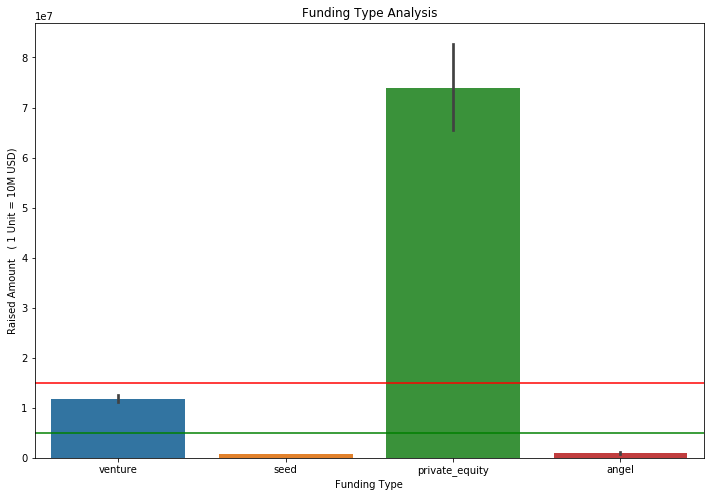

In [76]:
plt.figure(figsize=(12, 8))
plot_1=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plot_1.set(xlabel='Funding Type', ylabel='Raised Amount   ( 1 Unit = 10M USD)')
plot_1.set_title('Funding Type Analysis')

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')

plt.show()

Plot-2: A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

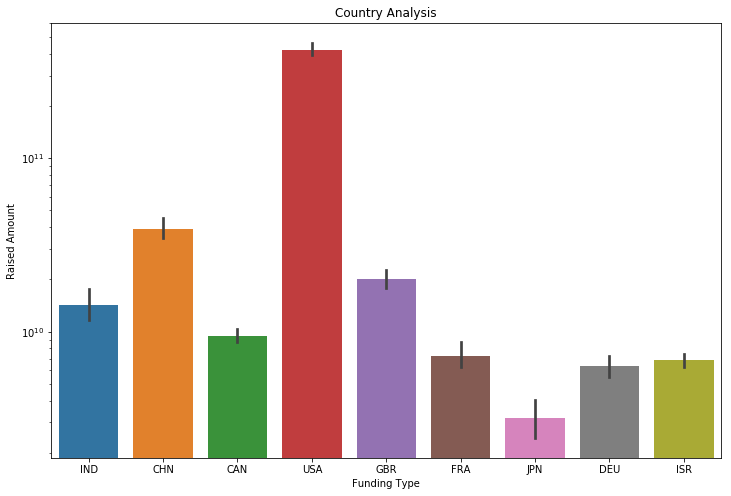

In [77]:
plt.figure(figsize=(12,8))
plot_2=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum)
# if we wont do this, the bars will be small and it is difficult to tell which country has more investment
plot_2.set_yscale('log')
plot_2.set(xlabel='Funding Type', ylabel='Raised Amount')
plot_2.set_title('Country Analysis')
plt.show()

Plot-3: A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

-> Since we have dataframes of top three english speaking countries separately (in D1, D2, D3), we need to create a one dataframe for these three countries (containing only top three sectors of these countries) and plot a bar plot

In [78]:
DF_top3 = D1[D1['main_sector'].isin(['Others', 'Cleantech / Semiconductors', 'Social, Finance, Analytics, Advertising'])]

In [79]:
# merging top three sectors in D2 to DF_top3
DF_top3 = DF_top3.append(D2[D2['main_sector'].isin(['Others', 'Cleantech / Semiconductors', 'Social, Finance, Analytics, Advertising'])], ignore_index=True)

In [80]:
# merging top three sectors in D3 to DF_top3
DF_top3 = DF_top3.append(D3[D3['main_sector'].isin(['Others', 'Social, Finance, Analytics, Advertising', 'News, Search and Messaging'])], ignore_index=True)

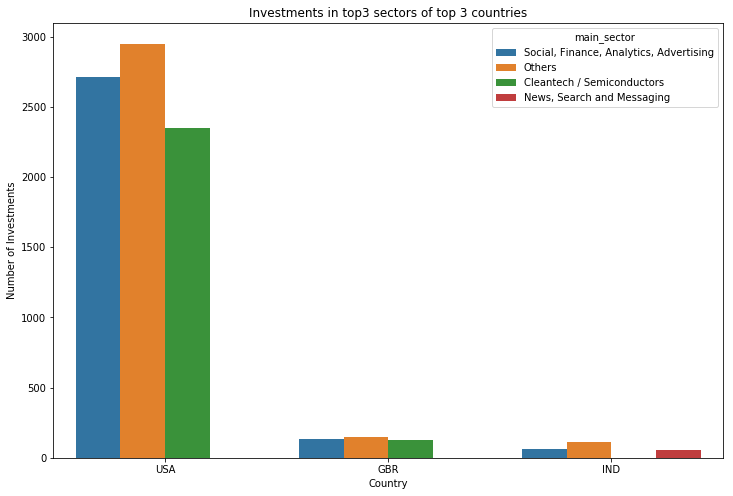

In [81]:
plt.figure(figsize=(12, 8))

# specify hue="categorical_variable"
plot_3=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=DF_top3,estimator=lambda x: len(x))
plot_3.set(xlabel='Country', ylabel='Number of Investments')
plot_3.set_title('Investments in top3 sectors of top 3 countries')
plt.show()